# 1

In [4]:
def astar(startNode, stopNode):
    openset = set(startNode)
    closedset = set()
    g = {}
    p = {}
    g[startNode] = 0
    p[startNode] = startNode
    
    while(len(openset)>0):
        n = None
        for v in openset:
            if n==None or g[v]+heuristic(v)<g[n]+heuristic(n):
                n = v
        
        if n==stopNode or graphNode[n] == None:
            pass
        else:
            for m,w in getNeigh(n):
                if m not in openset and m not in closedset:
                    openset.add(m)
                    g[m] = g[n]+w
                    p[m] = n
                else:
                    if g[m]>g[n]+w:
                        g[m] = g[n]+w
                        p[m] = n
                        if m in closedset:
                            closedset.remove(m)
                            openset.add(m)
                            
        if n==None:
            print("PDE")
            return None
        if n==stopNode:
            path = []
            while p[n]!=n:
                path.append(n)
                n = p[n]
            path.append(startNode)
            path.reverse()
            print("Path:",path)
            return path
        openset.remove(n)
        closedset.add(n)
    print("PDE")
    return None
def getNeigh(v):
    if v in graphNode:
        return graphNode[v]
    else:
        return None

def heuristic(v):
    h = {
        'A':9,
        'B':6,
        'C':3,
        'D':2,
        'E':0
    }
    return h[v]
graphNode = {
    'A':[('B',3),('D',10)],
    'B':[('A',3),('C',4),('E',6)],
    'C':[('B',4),('E',3)],
    'D':[('A',10),('E',2)]
}
astar('A','E')

Path: ['A', 'B', 'E']


['A', 'B', 'E']

# 3

In [8]:
import csv
with open(r"C:\Users\manit\Downloads\trainingexamples.csv") as file:
    csvData = csv.reader(file)
    data = list(csvData)
    
    specific = data[1][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]
    
    for i in data:
        if i[-1] == 'Yes':
            for j in range(len(specific)):
                if i[j]!=specific[j]:
                    specific[j] = '?'
                    general[j][j] = '?'
        if i[-1] == 'No':
            for j in range(len(specific)):
                if i[j]!=specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = '?'
        print("\nStep "+str(data.index(i)+1)+" candidate elimination algo")
        print("specific:",specific)
        print("general:\n",general)
    
    gh = []
    for i in general:
        for j in i:
            if j!='?':
                gh.append(i)
                break
    print("\nFinal specific hypo: \n",specific)
    print("\nFinal general hypo: \n",gh)



Step 1 candidate elimination algo
specific: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
general:
 [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2 candidate elimination algo
specific: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
general:
 [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 3 candidate elimination algo
specific: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
general:
 [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 4 candidate elimination algo
specific: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
gener

# 5

In [11]:
import numpy as np
x = np.array(([2,9],[1,5],[3,6]),dtype=float)
y = np.array(([92],[86],[89]),dtype=float)
x = x/np.amax(x)
y = y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))

def derivative_sigmoid(x):
    return x*(1-x)

epoch = 6000
lr = 0.1

wh = np.random.uniform(size=(2,3))
bh = np.random.uniform(size=(1,3))
wout = np.random.uniform(size=(3,1))
bout = np.random.uniform(size=(1,1))

for i in range(epoch):
    hinp = np.dot(x,wh)+bh
    hlayer_act = sigmoid(hinp)
    
    outinp = np.dot(hlayer_act,wout)+bout
    output = sigmoid(outinp)
    
    hidden_grad = derivative_sigmoid(hlayer_act)
    output_grad = derivative_sigmoid(output)
    
    EO = y-output
    d_output = EO*output_grad
    
    EH = d_output.dot(wout.T)
    d_hidden = EH*hidden_grad
    
    wout += hlayer_act.T.dot(d_output)*lr
    wh += x.T.dot(d_hidden)*lr

print("Input:\n",str(x))
print("actual op:\n",str(y))
print("predicted op:\n",output)

Input:
 [[0.22222222 1.        ]
 [0.11111111 0.55555556]
 [0.33333333 0.66666667]]
actual op:
 [[0.92]
 [0.86]
 [0.89]]
predicted op:
 [[0.89614235]
 [0.88266671]
 [0.89118155]]


# 7

In [21]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = load_iris()
x = pd.DataFrame(data['data'],columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(data['target'], columns = ["target"])

print(x.head())
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   target
0       0
1       0
2       0
3       0
4       0


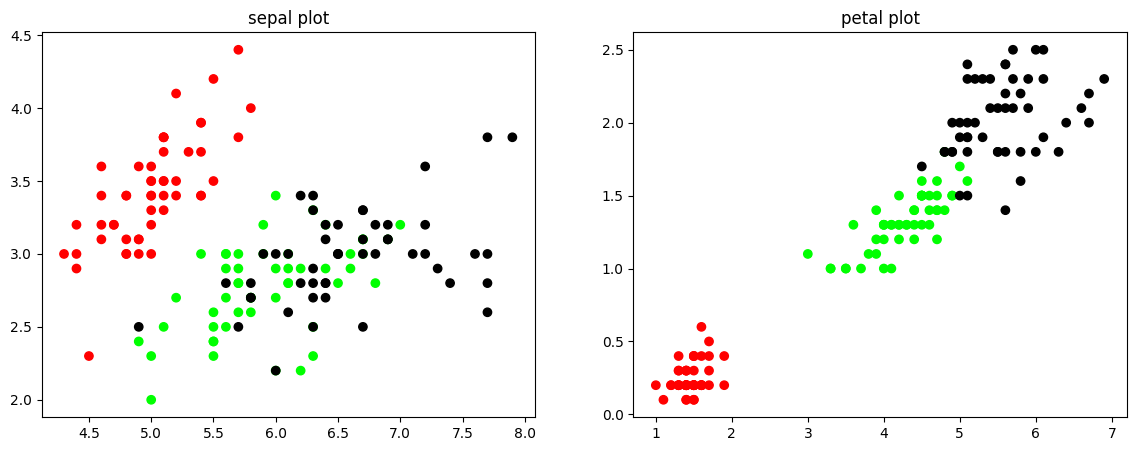

In [15]:
colormap = np.array(['red','lime','black'])
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(x.sepal_length,x.sepal_width,c=colormap[y.target])
plt.title('sepal plot')

plt.subplot(1,2,2)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y.target])
plt.title('petal plot')
plt.show()

accuracy score: 0.5333333333333333
confusion matrix:
 [[12  0  0]
 [ 0  1  6]
 [ 0  8  3]]


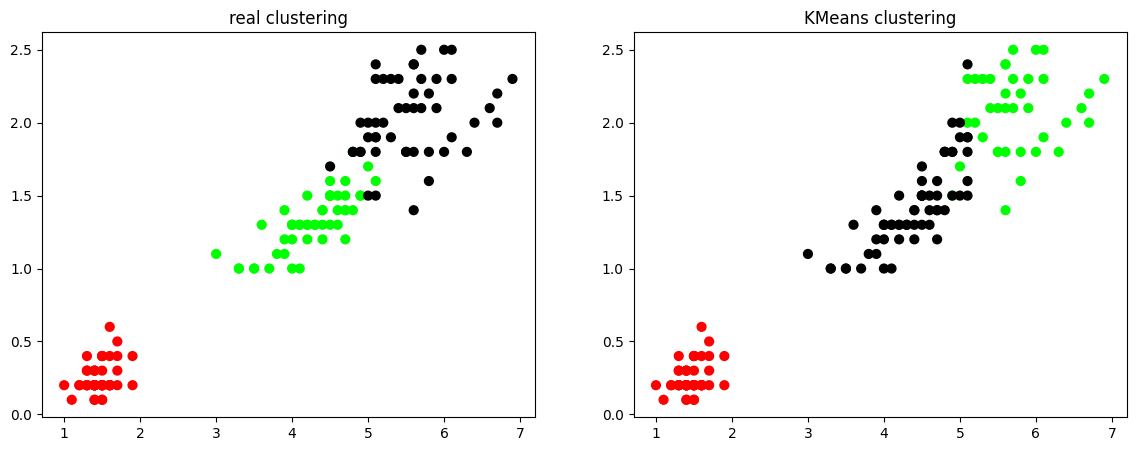

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)
model1 = KMeans(n_clusters=3)
model1.fit(x)
predicted = model1.predict(xtest)
print("accuracy score:",metrics.accuracy_score(predicted,ytest))
print("confusion matrix:\n",metrics.confusion_matrix(predicted,ytest))

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y.target],s=40)
plt.title("real clustering")

plt.subplot(1,2,2)
plt.scatter(x.petal_length,x.petal_width,c=colormap[model1.labels_],s=40)
plt.title("KMeans clustering")
plt.show()

accuracy score: 0.9666666666666667
confusion matrix:
 [[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


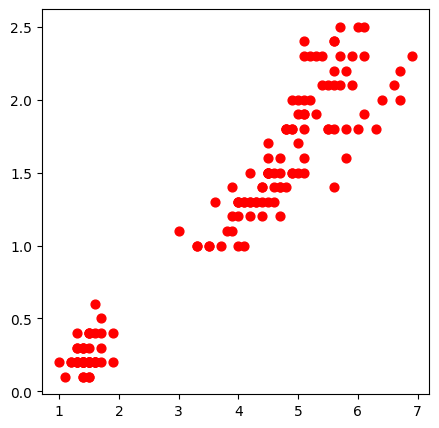

In [50]:
model2 = GaussianMixture(n_components=3)
model2.fit(xtrain,ytrain)
predicted2 = model2.predict(xtest)
print("accuracy score:",metrics.accuracy_score(predicted2,ytest))
print("confusion matrix:\n",metrics.confusion_matrix(predicted2,ytest))

plt.figure(figsize=(5,5))
plt.scatter(x.petal_length,x.petal_width,c=colormap[0],s=40)
plt.show()

# 9

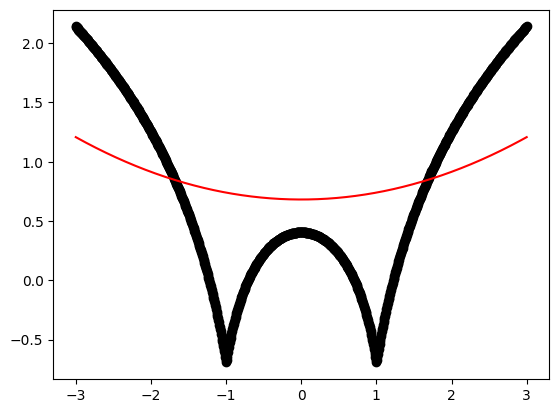

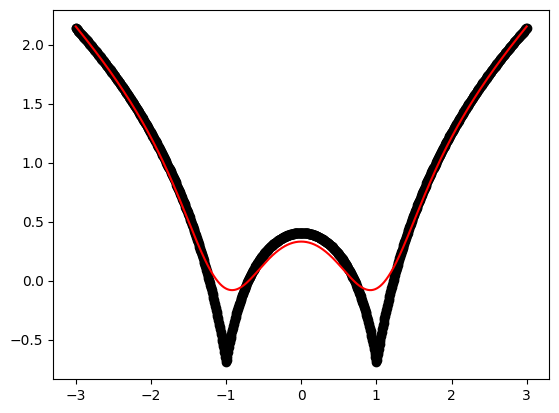

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def local_regression(x0, x, y, tau):
    x0 = [1,x0]
    x = [[1,i] for i in x]
    x = np.asarray(x)
    xw = (x.T)*np.exp(np.sum((x-x0)**2,axis=1)/(-2*tau))
    beta = np.linalg.pinv(xw@x)@xw@y@x0
    return beta

def draw(tau):
    prediction = [local_regression(x0,x,y,tau) for x0 in domain]
    plt.plot(x,y,'o',color = 'black')
    plt.plot(domain, prediction, color='red')
    plt.show()
x = np.linspace(-3,3,num=1000)
domain = x
y = np.log(np.abs(x**2-1)+0.5)
draw(10)
draw(0.1)

# 2

In [62]:
class graph1:
    def __init__(self, graph, start, heuristicNodeList):
        self.graph = graph
        self.start = start
        self.H = heuristicNodeList
        self.p = {}
        self.status = {}
        self.solu = {}
        
    def getNeigh(self, n):
        return self.graph.get(n,'')
    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0)
    def getStatus(self, v):
        return self.status.get(v,0)
    def setStatus(self, v, value):
        self.status[v] = value
    def setHeuristicNodeValue(self, n, value):
        self.H[n] = value
    def printSolution(self):
        print("for graph solution, traverse from start Node",self.start)
        print(self.solu)
        print("-------------------------------------------------------\n")
    
    def ApplyAstart(self):
        self.astar(self.start, False)
    
    def minCostChildNode(self, v):
        minCost =0
        minCostChildnodeDict = {}
        minCostChildnodeDict[minCost] = []
        flag = True
        
        for tuple in self.getNeigh(v):
            cost = 0
            nodeList = []
            for c,w in tuple:
                cost += self.getHeuristicNodeValue(c)+w
                nodeList.append(c)
            
            if flag==True:
                minCost = cost
                minCostChildnodeDict[minCost] = nodeList
                flag = False
            else:
                if minCost>cost:
                    minCost = cost
                    minCostChildnodeDict[minCost] = nodeList
                    
        return minCost, minCostChildnodeDict[minCost]
    def astar(self, v, backtracking):
        print("Heuristic node list:", self.H)
        print("solution graph:", self.solu)
        print("processing node",v)
        
        if self.getStatus(v)>=0:
            minCost, childNodeList = self.minCostChildNode(v)
            self.setHeuristicNodeValue(v, minCost)
            self.setStatus(v, len(childNodeList))
            solved = True
            
            for childNode in childNodeList:
                self.p[childNode] = v
                if self.getStatus(childNode)!=-1:
                    solved = solved&False
            
            if solved == True:
                self.setStatus(v,-1)
                self.solu[v] = childNodeList
                
            if v!=self.start:
                self.astar(self.p[v], True)
            
            if backtracking==False:
                for childNode in childNodeList:
                    self.setStatus(childNode, 0)
                    self.astar(childNode, False)
                    
h = {
    'A':1,
    'B':6,
    'C':12,
    'D':10,
    'E':4,
    'F':4,
    'G':5,
    'H':7
}
g = {
    'A':[[('B',1),('C',1)],[('D',1)]],
    'B':[[('E',1)],[('F',1)]],
    'D':[[('G',1),('H',1)]]
}

obj = graph1(g,'A',h)
obj.ApplyAstart()
obj.printSolution()

Heuristic node list: {'A': 1, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}
solution graph: {}
processing node A
Heuristic node list: {'A': 11, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}
solution graph: {}
processing node D
Heuristic node list: {'A': 11, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}
solution graph: {}
processing node A
Heuristic node list: {'A': 11, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}
solution graph: {}
processing node E
Heuristic node list: {'A': 11, 'B': 6, 'C': 12, 'D': 10, 'E': 0, 'F': 4, 'G': 5, 'H': 7}
solution graph: {'E': []}
processing node D
Heuristic node list: {'A': 11, 'B': 6, 'C': 12, 'D': 6, 'E': 0, 'F': 4, 'G': 5, 'H': 7}
solution graph: {'E': []}
processing node A
Heuristic node list: {'A': 7, 'B': 6, 'C': 12, 'D': 6, 'E': 0, 'F': 4, 'G': 5, 'H': 7}
solution graph: {'E': []}
processing node F
Heuristic node list: {'A': 7, 'B': 6, 'C': 12, 'D': 6, 'E': 0, 'F': 0, 'G': 5, 'H': 7}
solution graph

# 8

In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [72]:
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

xnew = np.array([[4.8, 3.4, 1.9, 0.2]])
predicted = knn.predict(xnew)
print("predicted value:",predicted)
val = iris["target_names"][predicted]
print("predicted label:",val)

predicted value: [0]
predicted label: ['setosa']


In [68]:
i = 1
for i in range(len(xtest)):
    xnew = np.array([xtest[i]])
    predicted = knn.predict(xnew)
    print("\n",xnew)
    print("predicted value:",predicted)
    print("actual Value:",ytest[i])
    val = iris["target_names"][predicted]
    print("predicted label:",val)


 [[5.8 2.8 5.1 2.4]]
predicted value: [2]
actual Value: 2
predicted label: ['virginica']

 [[6.  2.2 4.  1. ]]
predicted value: [1]
actual Value: 1
predicted label: ['versicolor']

 [[5.5 4.2 1.4 0.2]]
predicted value: [0]
actual Value: 0
predicted label: ['setosa']

 [[7.3 2.9 6.3 1.8]]
predicted value: [2]
actual Value: 2
predicted label: ['virginica']

 [[5.  3.4 1.5 0.2]]
predicted value: [0]
actual Value: 0
predicted label: ['setosa']

 [[6.3 3.3 6.  2.5]]
predicted value: [2]
actual Value: 2
predicted label: ['virginica']

 [[5.  3.5 1.3 0.3]]
predicted value: [0]
actual Value: 0
predicted label: ['setosa']

 [[6.7 3.1 4.7 1.5]]
predicted value: [1]
actual Value: 1
predicted label: ['versicolor']

 [[6.8 2.8 4.8 1.4]]
predicted value: [1]
actual Value: 1
predicted label: ['versicolor']

 [[6.1 2.8 4.  1.3]]
predicted value: [1]
actual Value: 1
predicted label: ['versicolor']

 [[6.1 2.6 5.6 1.4]]
predicted value: [2]
actual Value: 2
predicted label: ['virginica']

 [[6.4 3.2 4.5

In [71]:
knn.score(xtest, ytest)

0.9736842105263158

# 6

In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv(r"C:\Users\manit\Downloads\tennisdata.csv")
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [74]:
x

,Outlook,Temperature,Humidity,Windy
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [75]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: PlayTennis, dtype: object

In [76]:
out_le = LabelEncoder()
x.Outlook = out_le.fit_transform(x.Outlook)

temp_le = LabelEncoder()
x.Temperature = temp_le.fit_transform(x.Temperature)

hum_le = LabelEncoder()
x.Humidity = hum_le.fit_transform(x.Humidity)

wind_le = LabelEncoder()
x.Windy = wind_le.fit_transform(x.Windy)

y_le = LabelEncoder()
y = y_le.fit_transform(y)

x.head()

,Outlook,Temperature,Humidity,Windy
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


In [77]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [81]:
model = GaussianNB()
model.fit(x,y)
predicted = model.predict(x)
print("accuracy score:",metrics.accuracy_score(predicted,y))
model.score(x,y)

accuracy score: 0.9285714285714286


0.9285714285714286

In [86]:
from sklearn.feature_selection import mutual_info_classif
from pprint import pprint
from collections import Counter
import pandas as pd

def id3(df, attr_names, target_attr, default_class=None):
    cnt = Counter(x for x in df[target_attr])
    if len(cnt)==1:
        return next(iter(cnt))
    elif(df.empty or (not attr_names)):
        return default_class
    else:
        gain = mutual_info_classif(df[attr_names], df[target_attr], discrete_features=True)
        max_gain_index = gain.tolist().index(max(gain))
        
        best_attr = attr_names[max_gain_index]
        tree = {best_attr:{}}
        
        remain_arr = [i for i in attr_names if i!=best_attr]
        
        for attr_val, data_sub in df.groupby(best_attr):
            subtree = id3(data_sub, remain_arr, target_attr, default_class)
            tree[best_attr][attr_val] = subtree
            
        return tree



data = pd.read_csv(r"C:\Users\manit\Downloads\p-tennis (1).csv")
attr_names = data.columns.tolist()
print(attr_names)
attr_names.remove('PlayTennis')

for colnames in data.select_dtypes('object'):
    data[colnames],_ = data[colnames].factorize()
print(data)

tree = id3(data, attr_names, 'PlayTennis')
print("Tree structure:\n")
pprint(tree)

['Outlook', 'Temperature', 'Humidity', 'Windy', 'PlayTennis']
    Outlook  Temperature  Humidity  Windy  PlayTennis
0         0            0         0  False           0
1         0            0         0   True           0
2         1            0         0  False           1
3         2            1         0  False           1
4         2            2         1  False           1
5         2            2         1   True           0
6         1            2         1   True           1
7         0            1         0  False           0
8         0            2         1  False           1
9         2            1         1  False           1
10        0            1         1   True           1
11        1            1         0   True           1
12        1            0         1  False           1
13        2            1         0   True           0
Tree structure:

{'Outlook': {0: {'Humidity': {0: 0, 1: 1}},
             1: 1,
             2: {'Windy': {False: 1, True: 0}}}}